# TLDR: Macro Avg. F1 = 0.15%

# Default Setup

In [ ]:
# Dataloading Stuff
from google.colab import drive
from sys import path
import os

# Standard Stuff
!pip3 install numpy sklearn iterative-stratification pandas pyss3
from sklearn.model_selection import train_test_split

from pyss3 import SS3
from pyss3.util import Dataset, Evaluation, span

import numpy as np
import pandas as pd

drive.mount('/content/drive', force_remount=True)
path_root = '/content/drive/My Drive/NLP Lab/SingleLabel/'
path.append(path_root)
data_root = 'data/'

     |████████████████████████████████| 2.0MB 6.4MB/s 
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Load Data

In [ ]:
with open(path_root + data_root + 'CityReview/test.txt', 'r') as text_file:
  text = text_file.read().split('\n')

with open(path_root + data_root + 'CityReview/test_label.txt', 'r') as label_file:
  label = label_file.read().split('\n')

X_train, X_val, y_train, y_val = train_test_split(text, label, test_size = 0.2)

## Classify

Classification: 100%|██████████| 666/666 [00:01<00:00, 533.01it/s]



                         precision    recall  f1-score   support

               Ambience       0.53      0.37      0.43        54
     Ambience Anecdotes       0.00      0.00      0.00         0
 Ambience Miscellaneous       0.00      0.00      0.00         3
              Anecdotes       0.37      0.38      0.37        60
Anecdotes Miscellaneous       0.11      0.25      0.15         4
                   Food       0.59      0.63      0.61       173
          Food Ambience       0.00      0.00      0.00        12
         Food Anecdotes       0.00      0.00      0.00         4
     Food Miscellaneous       0.00      0.00      0.00         2
             Food Price       0.40      0.21      0.28        28
             Food Staff       0.29      0.17      0.21        30
          Miscellaneous       0.49      0.55      0.52       172
                Neutral       0.00      0.00      0.00         2
               Positive       0.00      0.00      0.00         0
                  Price

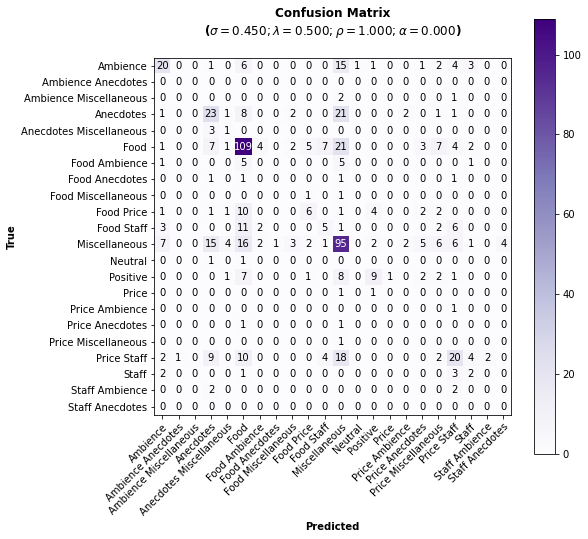

0.15084176394736878

In [ ]:
clf = SS3()
clf.fit(X_train, y_train, n_grams=5)
Evaluation.test(clf, X_val, y_val, metric="f1-score")